In [1]:
import pandas as pd
import sys
sys.path.insert(0, './Libs/Training/')
from sklearn.model_selection import TimeSeriesSplit
import trainingUtils as TU

In [2]:
Xlearn = pd.read_csv("./Data/PreprocessingOutput/Xlearn.csv", header = 0).values
ylearn = pd.read_csv("./Data/PreprocessingOutput/ylearn.csv", header = 0).values
tscv = TimeSeriesSplit(n_splits = 3)

TU._neuralNetworkGridSearch(Xlearn, ylearn, tscv)

Best score: -537.1251916611493 using {'hidden_layer_sizes': (250, 200)}


In [3]:
def neuralNetworkTrain(Xlearn, ylearn, tscv):
    performance = pd.DataFrame(columns=["Train Index", "MAE train", "MSE train", 
        "R2 train", "MAE test", "MSE test", "R2 test"])
    for trainIndex, Xtrain, ytrain, Xtest, ytest in TU._getTrainingData(Xlearn, ylearn, tscv):
        model, polymodel = TU._neuralNetworkTrain(Xtrain, ytrain)
        maeTrain, mseTrain, r2Train = TU._performance(ytrain, model.predict(polymodel.transform(Xtrain)))
        maeTest, mseTest, r2Test = TU._performance(ytest, model.predict(polymodel.transform(Xtest)))
        performance.loc[len(performance)] = [trainIndex, maeTrain, mseTrain, r2Train, maeTest, mseTest, r2Test]
    return performance

result = neuralNetworkTrain(Xlearn, ylearn, tscv.split(Xlearn))
print(result)

   Train Index  MAE train  MSE train   R2 train  MAE test  MSE test  \
0       1749.0   0.084662   0.029853 -41.478979  0.463382  0.514743   
1       3499.0   0.089802   0.021879 -34.364472  0.282517  0.109725   
2       5249.0   0.091287   0.036952 -67.517701  0.274800  0.130391   

      R2 test  
0 -961.908643  
1 -288.765336  
2 -360.701596  


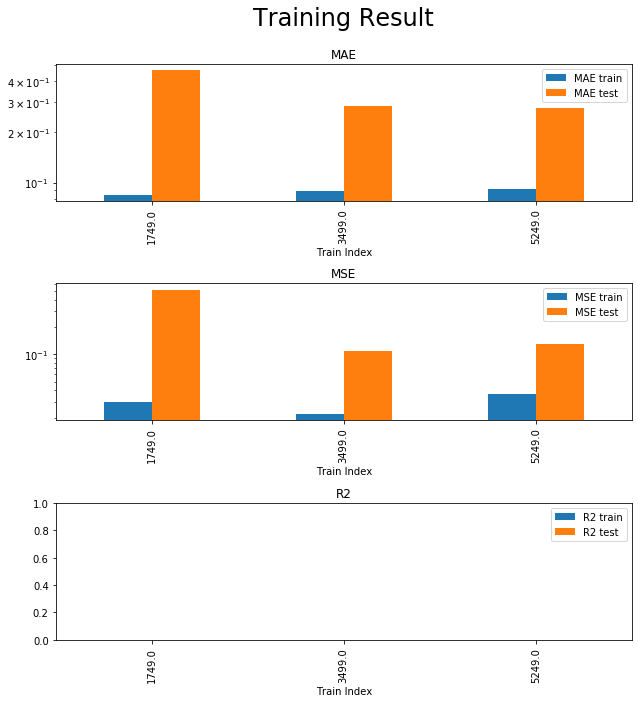

In [4]:
TU._plotTrainResult(result)

maeTest = 0.4978038611652274, mseTest = 0.5819277070982591, r2Test = -2770.3703451413603


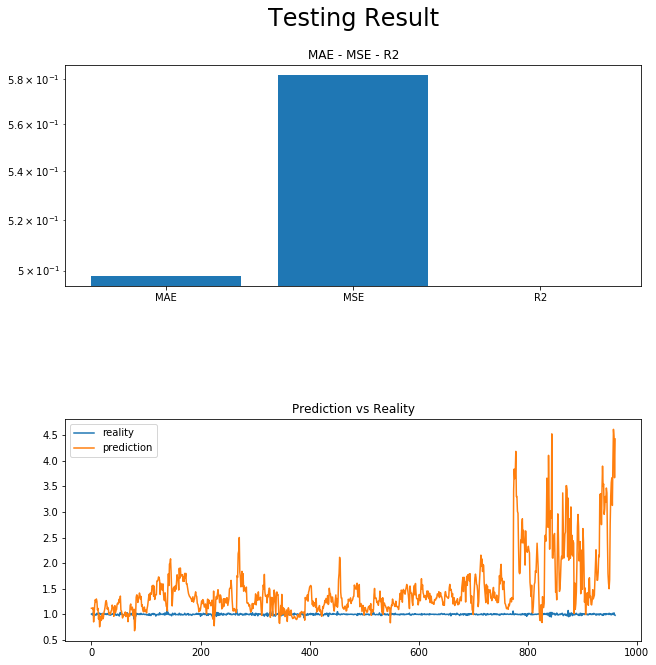

In [5]:
Xtest = pd.read_csv("./Data/PreprocessingOutput/Xtest.csv", header = 0).values
ytest = pd.read_csv("./Data/PreprocessingOutput/ytest.csv", header = 0).values

model, polymodel = TU._neuralNetworkTrain(Xlearn, ylearn)
maeTest, mseTest, r2Test, ypredict = TU._predictModel(Xtest, ytest, model, polymodel)
print(f"maeTest = {maeTest}, mseTest = {mseTest}, r2Test = {r2Test}")

axes = TU._plotTestResult(maeTest, mseTest, r2Test, ytest, ypredict)